In [1]:
import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

In [2]:
from thinkdsp import Sinusoid
from thinkdsp import normalize, unbias
import numpy as np

class SawtoothSignal(Sinusoid):  #Sinusoid:正弦曲線
    """Represents a sawtooth signal."""
    
    def evaluate(self, ts):
        """Evaluates the signal at the given times.

        ts: float array of times
        
        returns: float wave array
        """
        cycles = self.freq * ts + self.offset / np.pi / 2
        frac, _ = np.modf(cycles)
        ys = normalize(unbias(frac), self.amp)
        return ys

In [3]:
sawtooth = SawtoothSignal().make_wave(duration=1, framerate=20000)
sawtooth.make_audio()

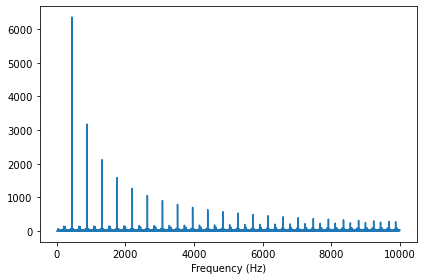

In [4]:
from thinkdsp import decorate

sawtooth.make_spectrum().plot()
decorate(xlabel='Frequency (Hz)')

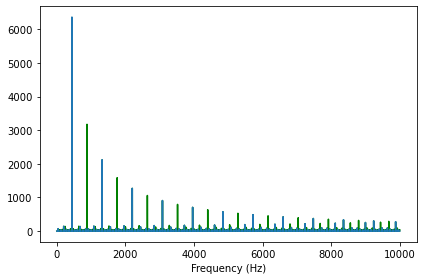

In [5]:
from thinkdsp import SquareSignal

sawtooth.make_spectrum().plot(color='green')
square = SquareSignal(amp=0.5).make_wave(duration=1, framerate=20000) #amp:振幅
square.make_spectrum().plot()
decorate(xlabel='Frequency (Hz)')

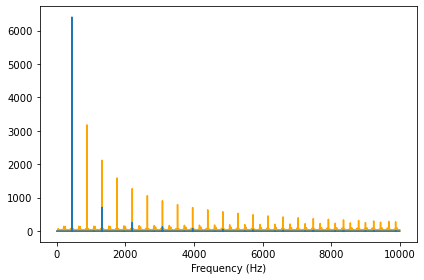

In [6]:
from thinkdsp import TriangleSignal

sawtooth.make_spectrum().plot(color='orange')
triangle = TriangleSignal(amp=0.79).make_wave(duration=1, framerate=20000)
triangle.make_spectrum().plot()
decorate(xlabel='Frequency (Hz)')